In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from IPython.display import display
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('complete/spotify_complete_data.csv')

In [3]:
# First, look at unique values in release_date column
print("Unique release dates:")
print(df['release_date'].unique())

# Convert dates more efficiently using pandas
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # 'coerce' will set invalid dates to NaT

# Drop any rows where date conversion failed
df = df.dropna(subset=['release_date'])

# Create a new dataframe with only 2022 tracks (using more efficient filtering)
df_2022 = df[df['release_date'].dt.year == 2022].copy()

# Reset the index
df_2022.reset_index(drop=True, inplace=True)

# Display information
print("\nOriginal Dataset Shape:", df.shape)
print("Filtered Dataset Shape:", df_2022.shape)
print("\nFiltered Dataset Info:")
df_2022.info()

# Display first few rows
print("\nFirst few rows:")
display(df_2022.head())

# Save to CSV
df_2022.to_csv('spotify_2022_tracks.csv', index=False)

Unique release dates:
['2020-03-27' '1999' '2015-06-15' ... '1994-03-16' '1994-01-21'
 '1999-08-04']

Original Dataset Shape: (7365226, 29)
Filtered Dataset Shape: (592850, 29)

Filtered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592850 entries, 0 to 592849
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        592850 non-null  int64         
 1   track_id          592850 non-null  object        
 2   track_title       592844 non-null  object        
 3   duration_ms       592850 non-null  int64         
 4   isrc              592850 non-null  object        
 5   release_id        592850 non-null  object        
 6   preview_url       590584 non-null  object        
 7   release_title     592849 non-null  object        
 8   release_date      592850 non-null  datetime64[ns]
 9   upc               592850 non-null  float64       
 10  popularity        59285

,Unnamed: 0,track_id,track_title,duration_ms,isrc,release_id,preview_url,release_title,release_date,upc,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1175,0vY8nQz7f5UX0RvyTRiWYo,Free - Extended Mix,343928,GBLV62213048,5nwkDeMVbewN9fjuuEs95Y,https://p.scdn.co/mp3-preview/bb3bab7084c182aa...,10 Years Muziek Colours (Dance Into Space),2022-12-26,5.054287e+12,...,0.810,0.7610,4,0.832,-8.760,0,0.0770,126,4,0.820
1,1176,1lNVHO1KZCM7jZMPpSZMIK,Right Night - Kohlenkeller Remix,423779,GBKQU2217855,5nwkDeMVbewN9fjuuEs95Y,https://p.scdn.co/mp3-preview/33242065c0795f20...,10 Years Muziek Colours (Dance Into Space),2022-12-26,5.054287e+12,...,0.672,0.8460,9,0.080,-11.228,1,0.0702,128,4,0.112
2,1177,1lNVHO1KZCM7jZMPpSZMIK,Right Night - Kohlenkeller Remix,423779,GBKQU2217855,5nwkDeMVbewN9fjuuEs95Y,https://p.scdn.co/mp3-preview/33242065c0795f20...,10 Years Muziek Colours (Dance Into Space),2022-12-26,5.054287e+12,...,0.672,0.8460,9,0.080,-11.228,1,0.0702,128,4,0.112
3,1178,1lNVHO1KZCM7jZMPpSZMIK,Right Night - Kohlenkeller Remix,423779,GBKQU2217855,5nwkDeMVbewN9fjuuEs95Y,https://p.scdn.co/mp3-preview/33242065c0795f20...,10 Years Muziek Colours (Dance Into Space),2022-12-26,5.054287e+12,...,0.672,0.8460,9,0.080,-11.228,1,0.0702,128,4,0.112
4,1179,1xozWhwTJo6fnfpnjnWkU1,Eyes Shut - Andyrave Remix,264766,GBKQU2105751,5nwkDeMVbewN9fjuuEs95Y,https://p.scdn.co/mp3-preview/b97a626b27c12ba4...,10 Years Muziek Colours (Dance Into Space),2022-12-26,5.054287e+12,...,0.925,0.0517,9,0.299,-3.574,1,0.0692,126,4,0.692


In [ ]:
# First, let's look at the unique formats in our release_date column
print("Sample of release dates before conversion:")
print(df['release_date'].head(10))

# Convert release_date to datetime with error handling
def convert_date(date_str):
    try:
        if len(str(date_str)) == 4:  # If it's just a year
            return pd.to_datetime(f"{date_str}-01-01")
        else:
            return pd.to_datetime(date_str)
    except:
        return None

# Convert dates
df['release_date'] = df['release_date'].apply(convert_date)

# Create a new dataframe with only 2020 tracks
df_2022 = df[df['release_date'].dt.year == 2022].copy()

# Reset the index of the new dataframe
df_2022.reset_index(drop=True, inplace=True)

# Display basic information about the filtered dataset
print("\nOriginal Dataset Shape:", df.shape)
print("Filtered Dataset Shape:", df_2022.shape)
print("\nFiltered Dataset Info:")
df_2022.info()

# Display first few rows of the filtered dataset
display(df_2022.head())

# Save the filtered dataset to a new CSV file
df_2022.to_csv('spotify_2022_tracks.csv', index=False)

Sample of release dates before conversion:
0    2020-03-27
1    2020-03-27
2          1999
3          1999
4    2020-03-27
5    2020-03-27
6    2020-03-27
7    2020-03-27
8    2020-03-27
9    2020-03-27
Name: release_date, dtype: object


In [ ]:
# Save the filtered dataset to a new CSV file


In [4]:
df_2022.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df_2022.drop_duplicates(subset=['track_id'], inplace=True)

In [6]:
df_2022.to_csv('spotify_2022_tracks.csv', index=False)

In [ ]:
plt.style.use('seaborn-v0_8')  # or simply use 'seaborn-darkgrid'
sns.set_theme()  # This will set the seaborn default themesns.set_palette("husl")

In [ ]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (7523890, 28)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7523890 entries, 0 to 7523889
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   track_id          object 
 1   track_title       object 
 2   duration_ms       int64  
 3   isrc              object 
 4   release_id        object 
 5   preview_url       object 
 6   release_title     object 
 7   release_date      object 
 8   upc               float64
 9   popularity        int64  
 10  total_tracks      int64  
 11  album_type        object 
 12  release_img       object 
 13  label_name        object 
 14  artist_id         object 
 15  artist_name       object 
 16  acousticness      float64
 17  danceability      float64
 18  energy            float64
 19  instrumentalness  float64
 20  key               int64  
 21  liveness          float64
 22  loudness          float64
 23  mode              int64  
 24  speechiness       float64
 25  t

In [ ]:
# Head
display(df.head())

,track_id,track_title,duration_ms,isrc,release_id,preview_url,release_title,release_date,upc,popularity,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,05h7hLxcBXnM3dgUZi7YmC,Suckhole,146878,DELJ82099977,2MDhYMdgU5GHMj70kc8Ja3,https://p.scdn.co/mp3-preview/1d7e30dbe20c810a...,Ese Modal,2020-03-27,4.050216e+12,0,...,0.585,0.771000,1,0.1690,-15.897,1,0.0356,106,4,0.3210
1,07E5VE2mJxaEESXkOHIq4J,Terrain,260000,DELJ82099961,2MDhYMdgU5GHMj70kc8Ja3,https://p.scdn.co/mp3-preview/d4ec1529eed983b2...,Ese Modal,2020-03-27,4.050216e+12,0,...,0.846,0.311000,9,0.4820,-13.267,1,0.1160,208,4,0.0505
2,0kg1lYyW3yAGgF7skgn2nx,Groove with You - Live,255666,USSM11501101,72MfvP136wxG7aeTUKzyJ7,https://p.scdn.co/mp3-preview/5f365a24295b2abc...,Wild in Woodstock: The Isley Brothers Live at ...,1999,8.864454e+11,20,...,0.436,0.000002,11,0.1580,-10.250,0,0.0753,90,4,0.5250
3,0xvdwCZkGpfA2kJ4rsIW8M,Livin' in the Life / Go for Your Guns - Live,322573,USSM11501105,72MfvP136wxG7aeTUKzyJ7,https://p.scdn.co/mp3-preview/132a1a5867131286...,Wild in Woodstock: The Isley Brothers Live at ...,1999,8.864454e+11,20,...,0.822,0.005130,10,0.0909,-6.740,0,0.0564,147,4,0.9440
4,1hTE9UU9I5XThxw1wurbLb,L.g. 1,92000,DELJ82099960,2MDhYMdgU5GHMj70kc8Ja3,https://p.scdn.co/mp3-preview/b4590d953e661c6e...,Ese Modal,2020-03-27,4.050216e+12,0,...,1.000,0.934000,6,0.1100,-19.087,1,0.0000,0,0,0.0000


In [10]:
# Stats
display(df.describe())



,duration_ms,upc,popularity,total_tracks,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,7.523890e+06,7.523830e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06,7.523890e+06
mean,3.413271e+05,3.719735e+12,3.676098e+00,1.519771e+01,9.804632e-02,6.876016e-01,7.246270e-01,6.122313e-01,5.579613e+00,1.744603e-01,-8.904773e+00,5.329625e-01,8.673305e-02,1.265372e+02,3.966318e+00,4.055096e-01
std,1.718325e+05,2.568748e+12,8.764920e+00,1.422160e+01,2.082649e-01,1.502421e-01,2.018276e-01,3.515615e-01,3.685356e+00,1.652710e-01,3.968840e+00,4.989123e-01,8.337840e-02,1.983951e+01,2.883860e-01,2.543796e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.496120e+05,8.535658e+11,0.000000e+00,5.000000e+00,9.170000e-04,6.140000e-01,6.000000e-01,2.860000e-01,2.000000e+00,8.130000e-02,-1.070700e+01,0.000000e+00,4.490000e-02,1.210000e+02,4.000000e+00,1.880000e-01
50%,3.458820e+05,4.065328e+12,0.000000e+00,1.100000e+01,7.750000e-03,7.240000e-01,7.590000e-01,8.050000e-01,6.000000e+00,1.090000e-01,-8.388000e+00,1.000000e+00,5.830000e-02,1.260000e+02,4.000000e+00,3.790000e-01
75%,4.144580e+05,5.054285e+12,2.000000e+00,2.000000e+01,6.730000e-02,8.000000e-01,8.880000e-01,8.860000e-01,9.000000e+00,1.930000e-01,-6.387000e+00,1.000000e+00,8.700000e-02,1.300000e+02,4.000000e+00,5.970000e-01
max,7.432618e+06,8.033075e+13,8.700000e+01,3.650000e+02,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,5.485000e+00,1.000000e+00,9.690000e-01,2.500000e+02,5.000000e+00,1.000000e+00


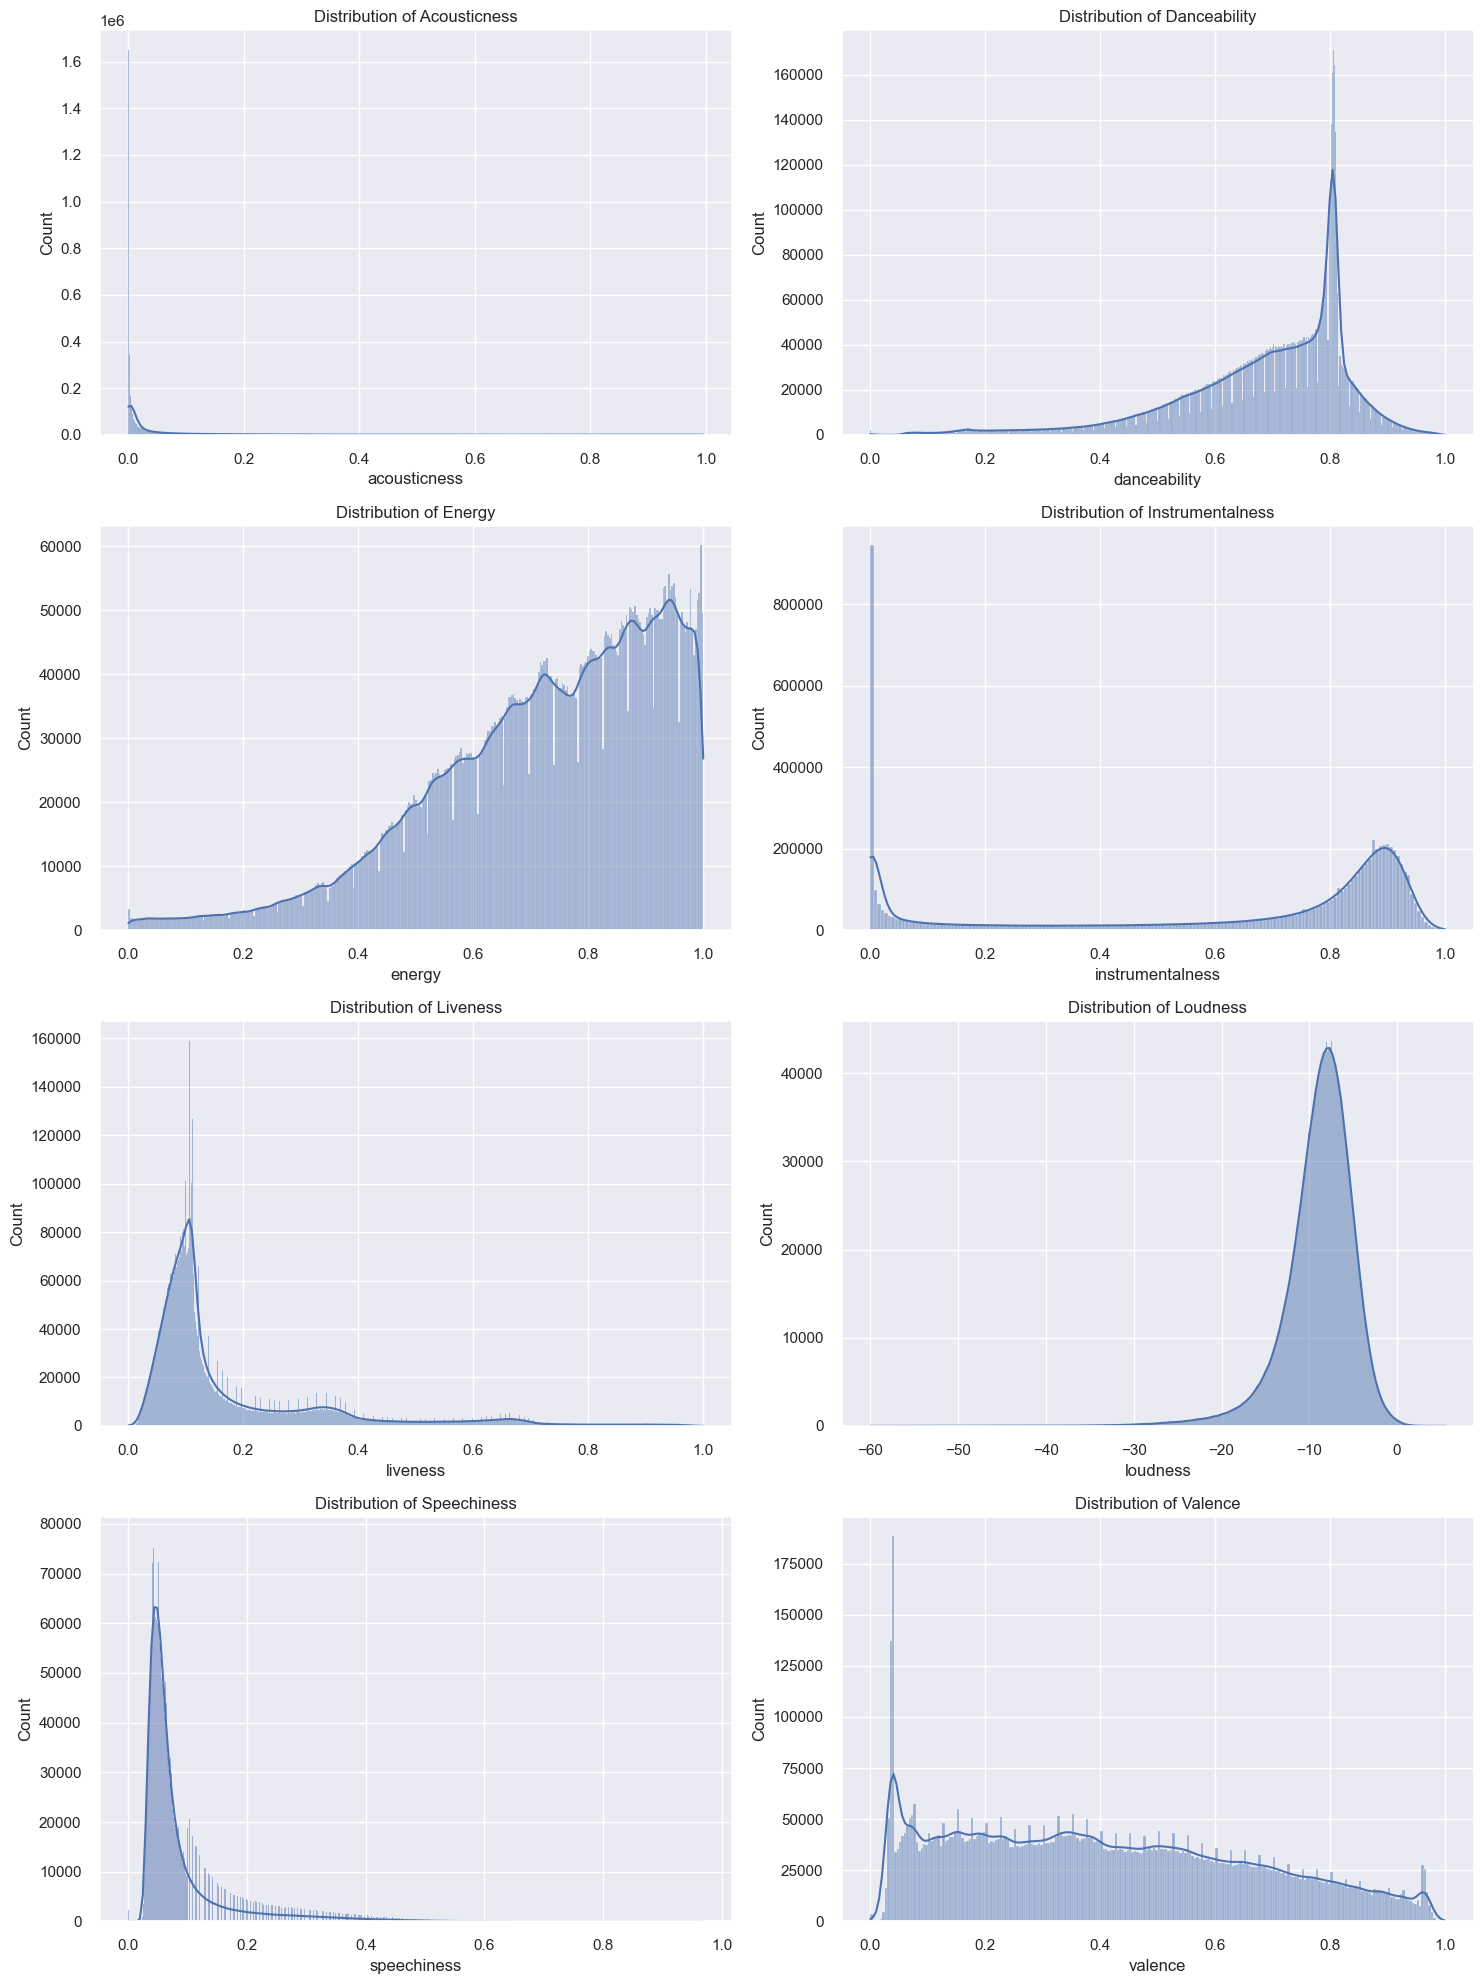

In [11]:
# Create a function to plot audio feature distributions
def plot_audio_features_dist(df):
    features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                'liveness', 'loudness', 'speechiness', 'valence']
    
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))
    axes = axes.ravel()
    
    for idx, feature in enumerate(features):
        sns.histplot(data=df, x=feature, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature.capitalize()}')
        
    plt.tight_layout()
    plt.show()

plot_audio_features_dist(df)

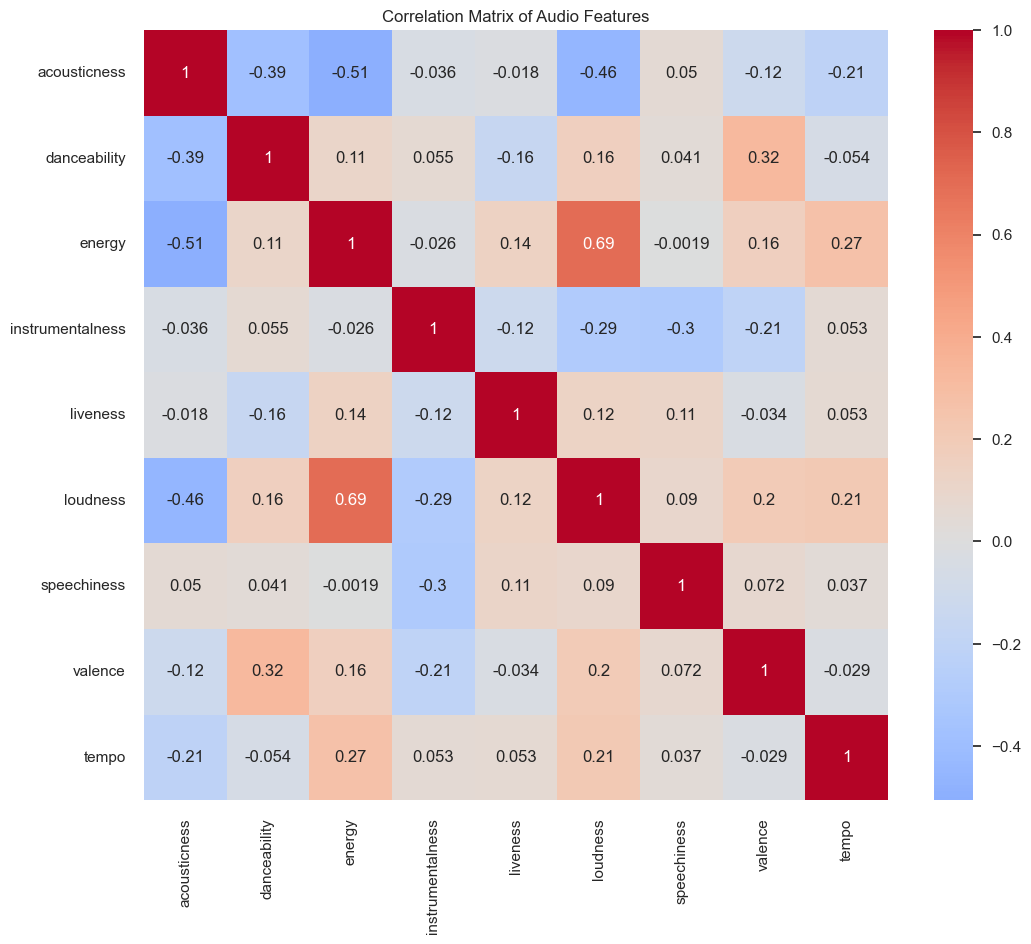

In [12]:
# Select numerical columns for correlation analysis
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                     'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Audio Features')
plt.show()

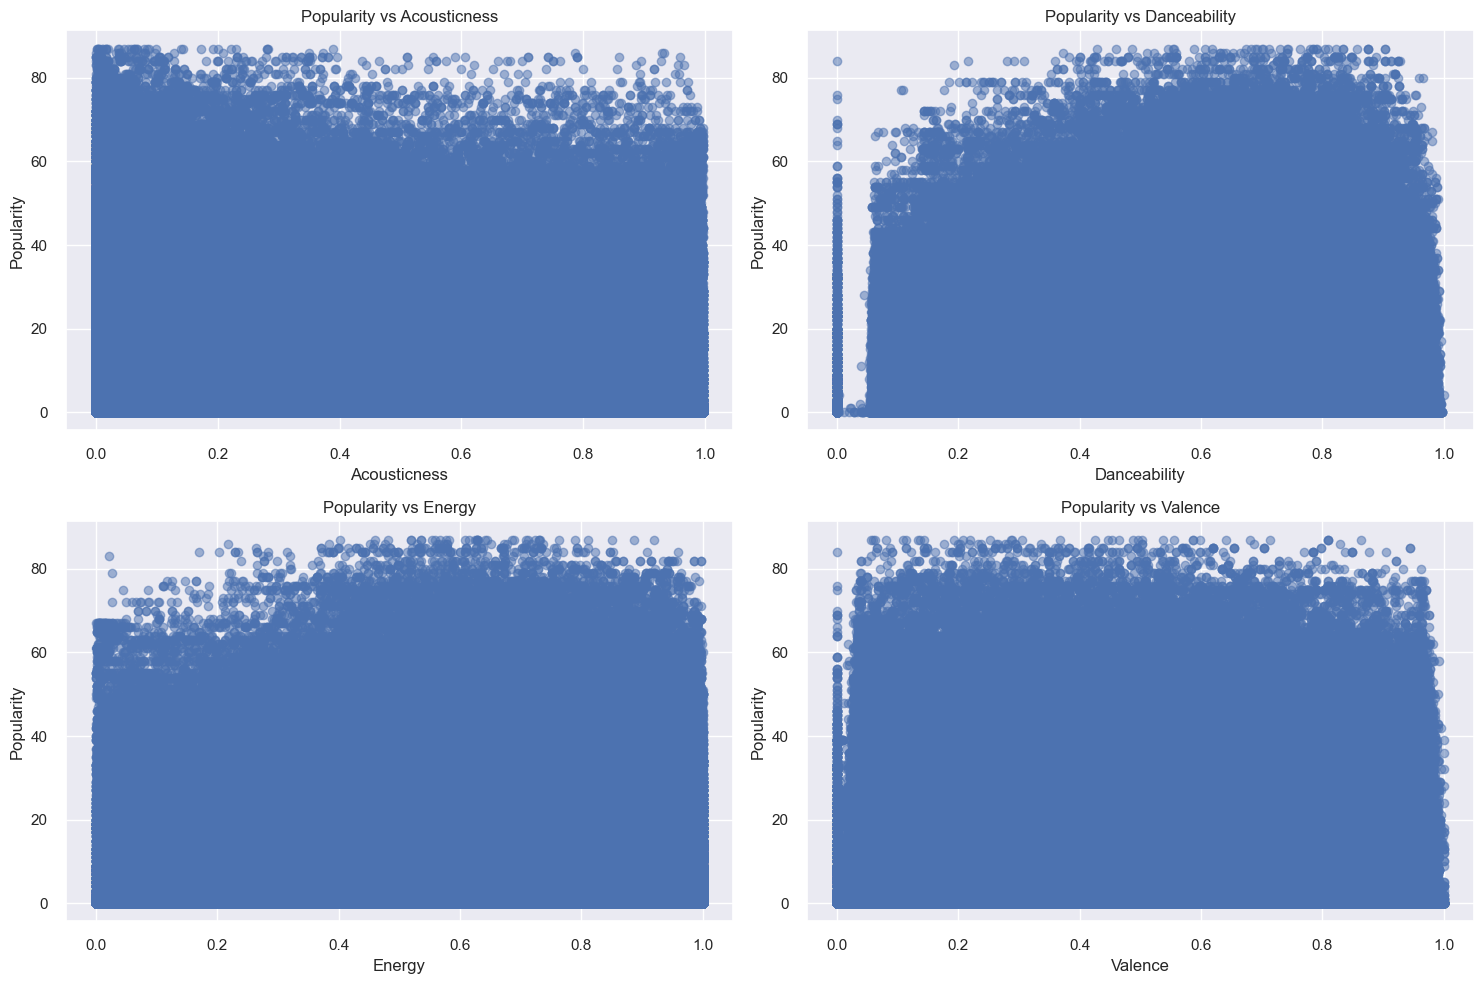

In [13]:
# Create scatter plots of popularity vs other features
def plot_popularity_relationships(df):
    features = ['acousticness', 'danceability', 'energy', 'valence']
    
    fig = plt.figure(figsize=(15, 10))
    
    for idx, feature in enumerate(features, 1):
        plt.subplot(2, 2, idx)
        plt.scatter(df[feature], df['popularity'], alpha=0.5)
        plt.xlabel(feature.capitalize())
        plt.ylabel('Popularity')
        plt.title(f'Popularity vs {feature.capitalize()}')
    
    plt.tight_layout()
    plt.show()

plot_popularity_relationships(df)

In [15]:
# Convert release_date to datetime with mixed format handling
def convert_date(date_str):
    if len(str(date_str)) == 4:  # If it's just a year
        return pd.to_datetime(date_str, format='%Y')
    else:  # If it's a full date
        return pd.to_datetime(date_str)

# Convert dates and create timeline visualization
df['release_date'] = df['release_date'].apply(convert_date)

plt.figure(figsize=(15, 6))
plt.hist(df['release_date'], bins=30, edgecolor='black')
plt.title('Distribution of Track Release Dates')
plt.xlabel('Release Date')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

# Let's also add some additional date analysis
print("\nDate Range Analysis:")
print(f"Earliest Release: {df['release_date'].min()}")
print(f"Latest Release: {df['release_date'].max()}")

# Group by year and count tracks
yearly_tracks = df.groupby(df['release_date'].dt.year)['track_title'].count()

plt.figure(figsize=(15, 6))
yearly_tracks.plot(kind='bar')
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 0000, at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

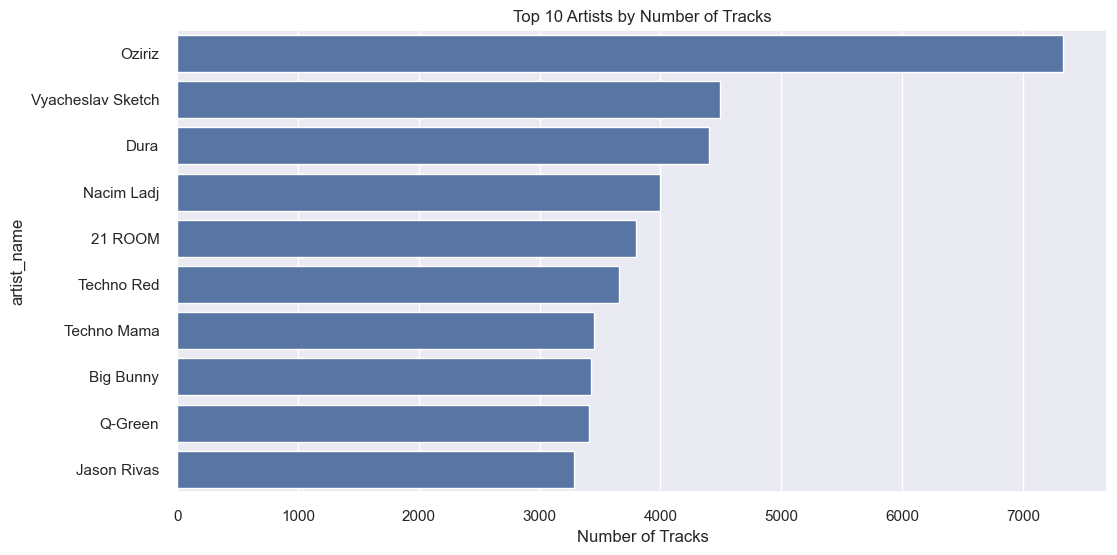

In [16]:
# Get top artists by number of tracks
artist_tracks = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=artist_tracks.values, y=artist_tracks.index)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.show()

# Calculate average audio features by artist
artist_features = df.groupby('artist_name')[['danceability', 'energy', 'valence']].mean()
top_artists = artist_features.loc[artist_tracks.index]

# Create radar chart for top artists
import plotly.graph_objects as go

categories = ['Danceability', 'Energy', 'Valence']
fig = go.Figure()

for artist in top_artists.index[:5]:  # Limit to top 5 for clarity
    fig.add_trace(go.Scatterpolar(
        r=top_artists.loc[artist],
        theta=categories,
        fill='toself',
        name=artist
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title='Audio Features by Top Artists'
)

fig.show()

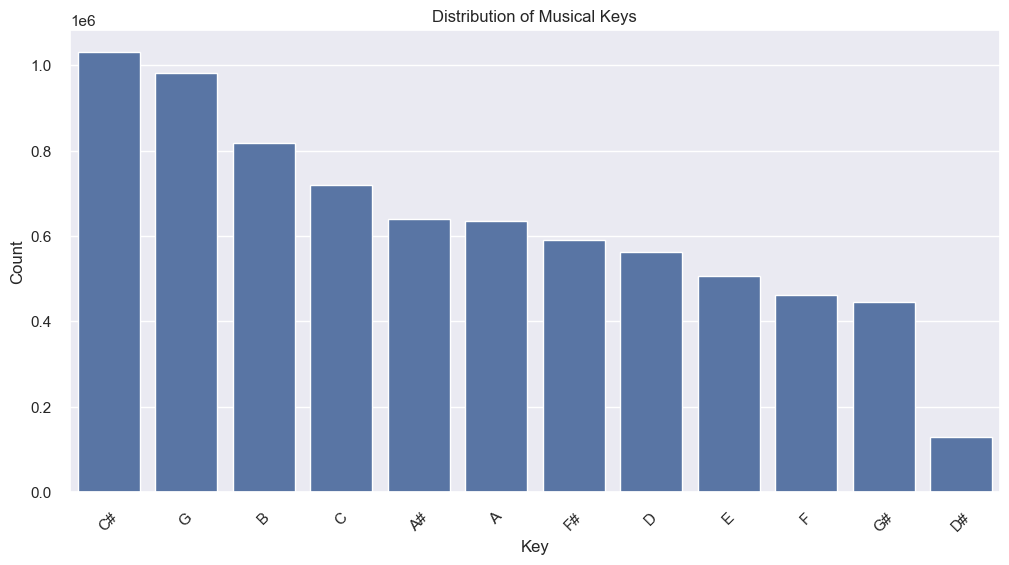

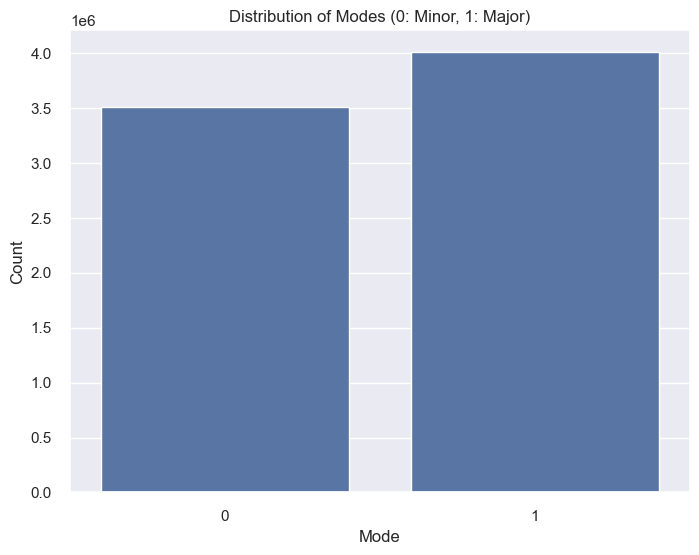

In [17]:
# Create a function to map musical keys to their names
def get_key_name(key_number):
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    return keys[key_number]

# Add key names to the dataframe
df['key_name'] = df['key'].apply(get_key_name)

# Create visualization for key distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='key_name', order=df['key_name'].value_counts().index)
plt.title('Distribution of Musical Keys')
plt.xlabel('Key')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create visualization for mode distribution (Major/Minor)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='mode')
plt.title('Distribution of Modes (0: Minor, 1: Major)')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

In [ ]:
# 2. Box Plots of Audio Features by Album Type
features = ['danceability', 'energy', 'valence', 'acousticness']

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=features)

row = 1
col = 1
for feature in features:
    fig.add_trace(
        go.Box(x=df['album_type'], y=df[feature], name=feature),
        row=row, col=col
    )
    if col == 2:
        row += 1
        col = 1
    else:
        col += 1

fig.update_layout(height=800, 
                 width=1000, 
                 title_text="Distribution of Audio Features by Album Type",
                 showlegend=False)
fig.show()